--- Model Performance ---

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.99      0.76      0.86       228

    accuracy                           1.00    209715
   macro avg       0.99      0.88      0.93    209715
weighted avg       1.00      1.00      1.00    209715

ROC AUC Score: 0.9646



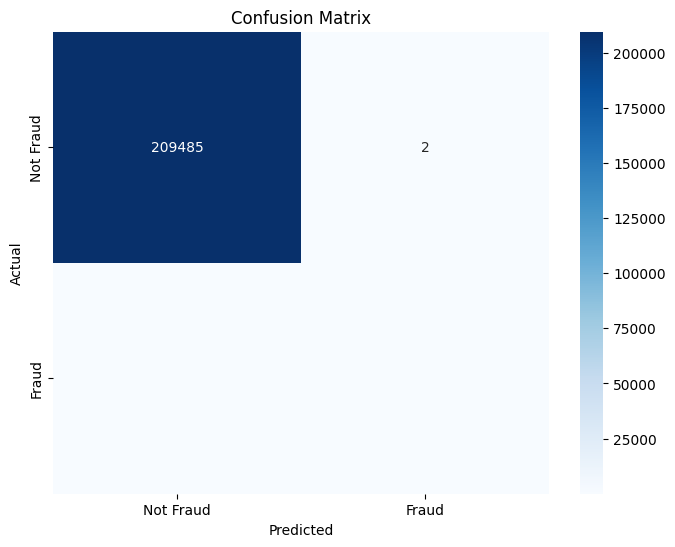

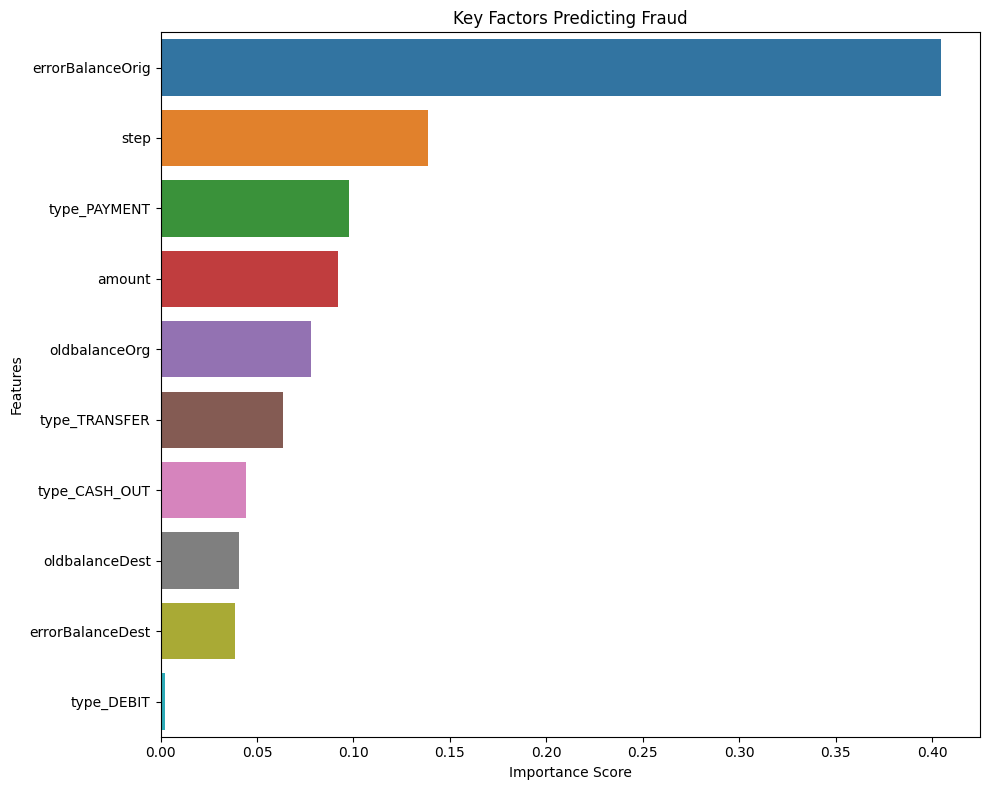


--- Top 5 Most Important Features ---
         feature  importance
errorBalanceOrig    0.404477
            step    0.138573
    type_PAYMENT    0.097739
          amount    0.091719
   oldbalanceOrg    0.077875


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('Fraud3.csv')
except FileNotFoundError:
    print("Error: 'Fraud3.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Feature Engineering
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']
df = pd.get_dummies(df, columns=['type'], prefix='type', drop_first=True)

# Feature Selection and Data Splitting
X = df.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest', 'newbalanceOrig', 'newbalanceDest'], axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced", n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# Model Evaluation
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

print("--- Model Performance ---")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}\n")

# Visualization: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Feature Importance Analysis
importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Visualization: Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Key Factors Predicting Fraud')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

print("\n--- Top 5 Most Important Features ---")
print(feature_importance_df.head().to_string(index=False))